In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('muestra_procesada.xlsx')
df.head()

,Índice,Nombre empresa,Número BvD,Código primario,Códigos secundarios,Descripción actividad preprocesada,sector,división,grupo,clase
0,1,KL GRUT 78 SLU,ESB57648966,4332,NaN,fabricacion compraventar detall mayorista real...,F,43,433,4332
1,2,GENERAL DE ENCOFRADOS Y CIMENTACIONES SL,ESB10394724,4120,NaN,creacion adquisicion reforma explotacion cuent...,F,41,412,4120
2,3,ELECTRO OSMA 2018 SOCIEDAD LIMITADA.,ESB02606168,4321,NaN,realizacion instalacion electrico general mont...,F,43,432,4321
3,4,CHANRIL TRADE SL,ESB82716226,6820,NaN,venta mayor tipo articulo menaje hogar regalo,L,68,682,6820
4,5,LA POSADA DEL MAR SL,ESB53552972,5510,NaN,explotacion hotel cuatro estrella,I,55,551,5510


In [3]:
# Crear vectores con la columna 'Descripción de actividad'
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Descripción actividad preprocesada'])
tfidf_array = tfidf_matrix.toarray()

# Función para calcular la entropía
def calculate_entropy(tfidf_vector):
    # Filtrar los ceros del vector TF-IDF
    tfidf_vector = tfidf_vector[tfidf_vector > 0]
    # Calcular la entropía
    entropy = -np.sum(tfidf_vector * np.log(tfidf_vector))
    return entropy

# Calcular la entropía para cada grupo
group_entropies = {}
for group in df['sector'].unique():
    # Filtrar las filas del grupo
    group_indices = df[df['sector'] == group].index
    # Obtener las puntuaciones TF-IDF del grupo
    group_tfidf = tfidf_array[group_indices]
    # Aplanar y filtrar los ceros
    group_tfidf_combined = group_tfidf.flatten()
    group_tfidf_combined = group_tfidf_combined[group_tfidf_combined > 0]
    # Calcular la entropía
    group_entropy = calculate_entropy(group_tfidf_combined)
    group_entropies[group] = group_entropy

# Mostrar las entropías por grupo
group_entropies



{'F': 26153.12390450072,
 'L': 8008.413600063446,
 'I': 11354.987336679253,
 'G': 34960.84721474449,
 'C': 14091.46850314578,
 'P': 2005.5053502814321,
 'H': 5530.719799010301,
 'N': 5710.674484219768,
 'Q': 3445.2316010772515,
 'A': 3780.066850707566,
 'K': 2655.782921955974,
 'M': 12385.260736930857,
 'J': 4534.015264727179,
 'D': 1108.3418643576765,
 'R': 2482.659043280342,
 'E': 438.34547722055447,
 'S': 1778.7859146420956,
 'B': 319.58681101930307,
 'O': 10.263470359216244,
 'T': 7.173613529185639,
 'U': 7.323719945341799}

In [4]:
# Obtener la entropía media para la clasificación NACE
values = group_entropies.values()
mean_value = sum(values) / len(values)
print(f'La entropía media para la clasificación NACE es: {mean_value}')

La entropía media para la clasificación NACE es: 6703.265594399891


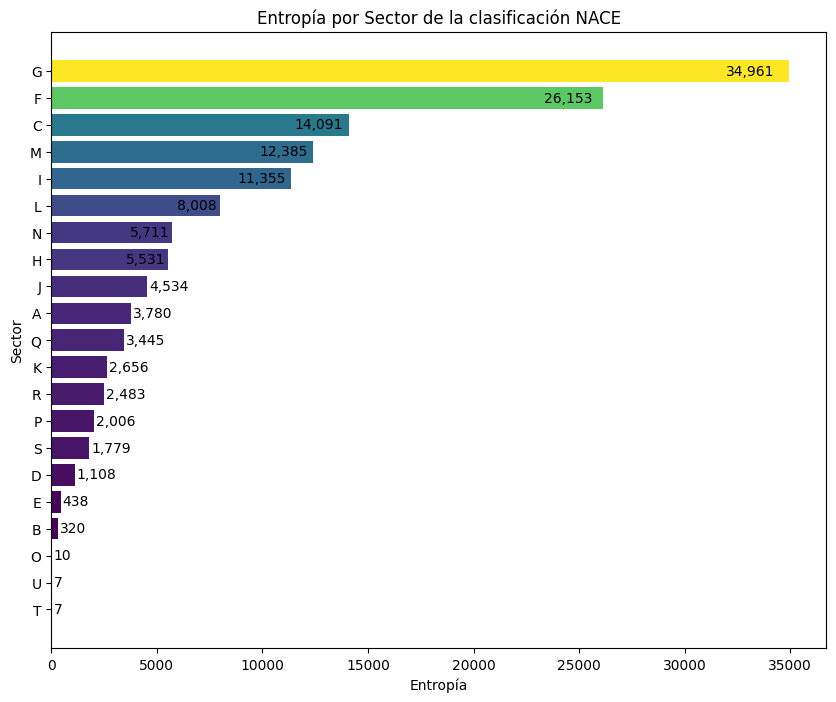

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el diccionario en un DataFrame
df_entropy = pd.DataFrame(list(group_entropies.items()), columns=['Sectores', 'Entropía'])

# Ordenar el DataFrame por entropía media
df_entropy = df_entropy.sort_values(by='Entropía')

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
bars = plt.barh(df_entropy['Sectores'], df_entropy['Entropía'], color=plt.cm.viridis(df_entropy['Entropía'] / max(df_entropy['Entropía'])))

# Añadir etiquetas y título
plt.xlabel('Entropía')
plt.ylabel('Sector')
plt.title('Entropía por Sector de la clasificación NACE')

#Añadir el número de sectores
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - (width * 0.02) if width > 5000 else width + 100
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center', ha='right' if width > 5000 else 'left', color='black' if width > 5000 else 'black')


# Mostrar el gráfico
plt.show()
